PDF file found: C:\Users\clint\Desktop\RER\data\Remittance_3\Remitscope_LatAm_central_bank.pdf
Converting pages 36-40 to images...
Successfully converted 5 pages to images
Successfully converted 5 pages to images


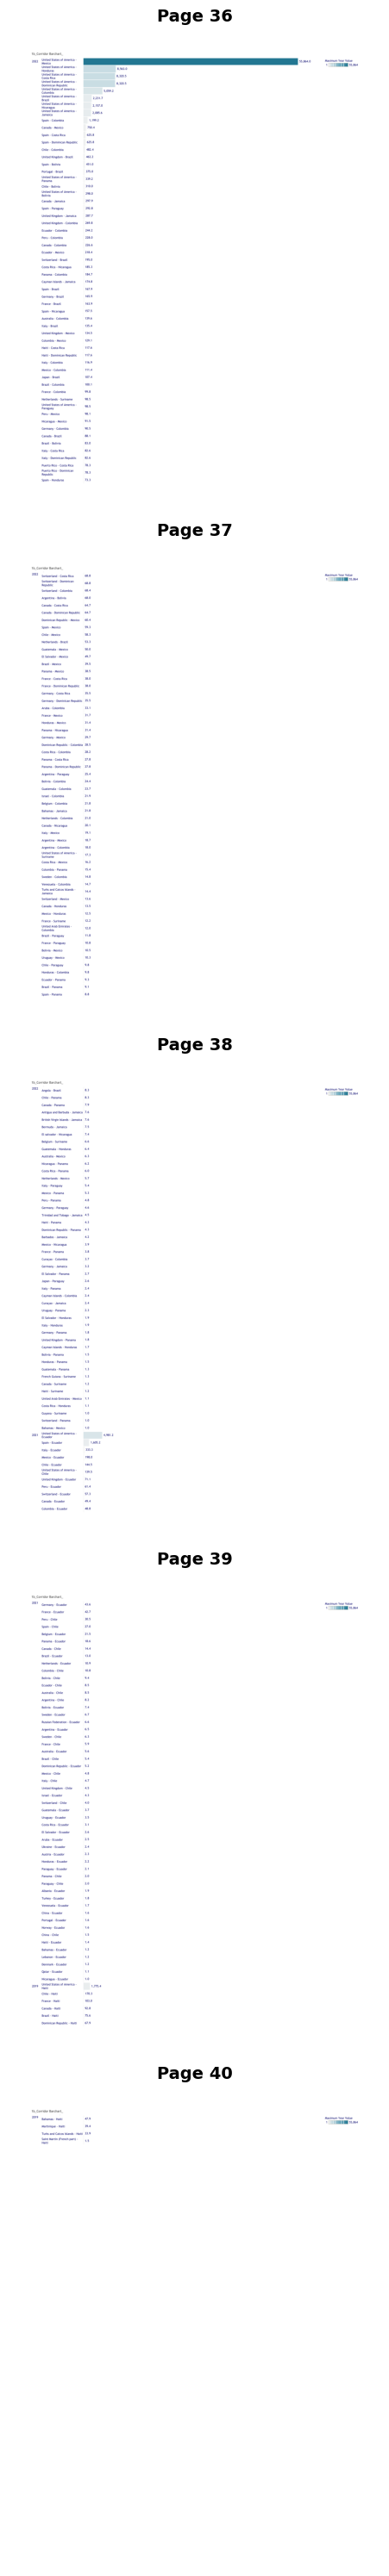

Saved page 36 as: C:\Users\clint\Desktop\RER\data\Remittance_3\remitscope_page_36.png
Saved page 37 as: C:\Users\clint\Desktop\RER\data\Remittance_3\remitscope_page_37.png
Saved page 38 as: C:\Users\clint\Desktop\RER\data\Remittance_3\remitscope_page_38.png
Saved page 39 as: C:\Users\clint\Desktop\RER\data\Remittance_3\remitscope_page_39.png
Saved page 40 as: C:\Users\clint\Desktop\RER\data\Remittance_3\remitscope_page_40.png

All 5 pages saved successfully!
Files saved:
  - C:\Users\clint\Desktop\RER\data\Remittance_3\remitscope_page_36.png
  - C:\Users\clint\Desktop\RER\data\Remittance_3\remitscope_page_37.png
  - C:\Users\clint\Desktop\RER\data\Remittance_3\remitscope_page_38.png
  - C:\Users\clint\Desktop\RER\data\Remittance_3\remitscope_page_39.png
  - C:\Users\clint\Desktop\RER\data\Remittance_3\remitscope_page_40.png
Saved page 40 as: C:\Users\clint\Desktop\RER\data\Remittance_3\remitscope_page_40.png

All 5 pages saved successfully!
Files saved:
  - C:\Users\clint\Desktop\RER\d

In [1]:
import os
from pdf2image import convert_from_path
from PIL import Image
import matplotlib.pyplot as plt

# Path to the PDF file
pdf_path = r"C:\Users\clint\Desktop\RER\data\Remittance_3\Remitscope_LatAm_central_bank.pdf"

# Check if file exists
if not os.path.exists(pdf_path):
    print(f"Error: PDF file not found at {pdf_path}")
else:
    print(f"PDF file found: {pdf_path}")
    
    try:
        # Convert pages 36-40 to images (page numbers are 0-indexed, so 35-39)
        print("Converting pages 36-40 to images...")
        images = convert_from_path(
            pdf_path, 
            first_page=36, 
            last_page=40,
            dpi=200  # Higher DPI for better quality
        )
        
        print(f"Successfully converted {len(images)} pages to images")
        
        # Display the images
        fig, axes = plt.subplots(len(images), 1, figsize=(12, 6*len(images)))
        if len(images) == 1:
            axes = [axes]
        
        for i, img in enumerate(images):
            axes[i].imshow(img)
            axes[i].set_title(f'Page {36 + i}', fontsize=14, fontweight='bold')
            axes[i].axis('off')
        
        plt.tight_layout()
        plt.show()
        
        # Save images to files
        output_dir = r"C:\Users\clint\Desktop\RER\data\Remittance_3"
        os.makedirs(output_dir, exist_ok=True)
        
        saved_files = []
        for i, img in enumerate(images):
            page_num = 36 + i
            filename = f"remitscope_page_{page_num}.png"
            filepath = os.path.join(output_dir, filename)
            img.save(filepath, "PNG", dpi=(200, 200))
            saved_files.append(filepath)
            print(f"Saved page {page_num} as: {filepath}")
        
        print(f"\nAll {len(images)} pages saved successfully!")
        print("Files saved:")
        for file in saved_files:
            print(f"  - {file}")
            
    except Exception as e:
        print(f"Error processing PDF: {str(e)}")
        print("Note: You might need to install poppler-utils for pdf2image to work properly.")
        print("On Windows, you can download poppler from: https://github.com/oschwartz10612/poppler-windows/releases/")

Using PyMuPDF to process: C:\Users\clint\Desktop\RER\data\Remittance_3\Remitscope_LatAm_central_bank.pdf
PDF has 67 pages


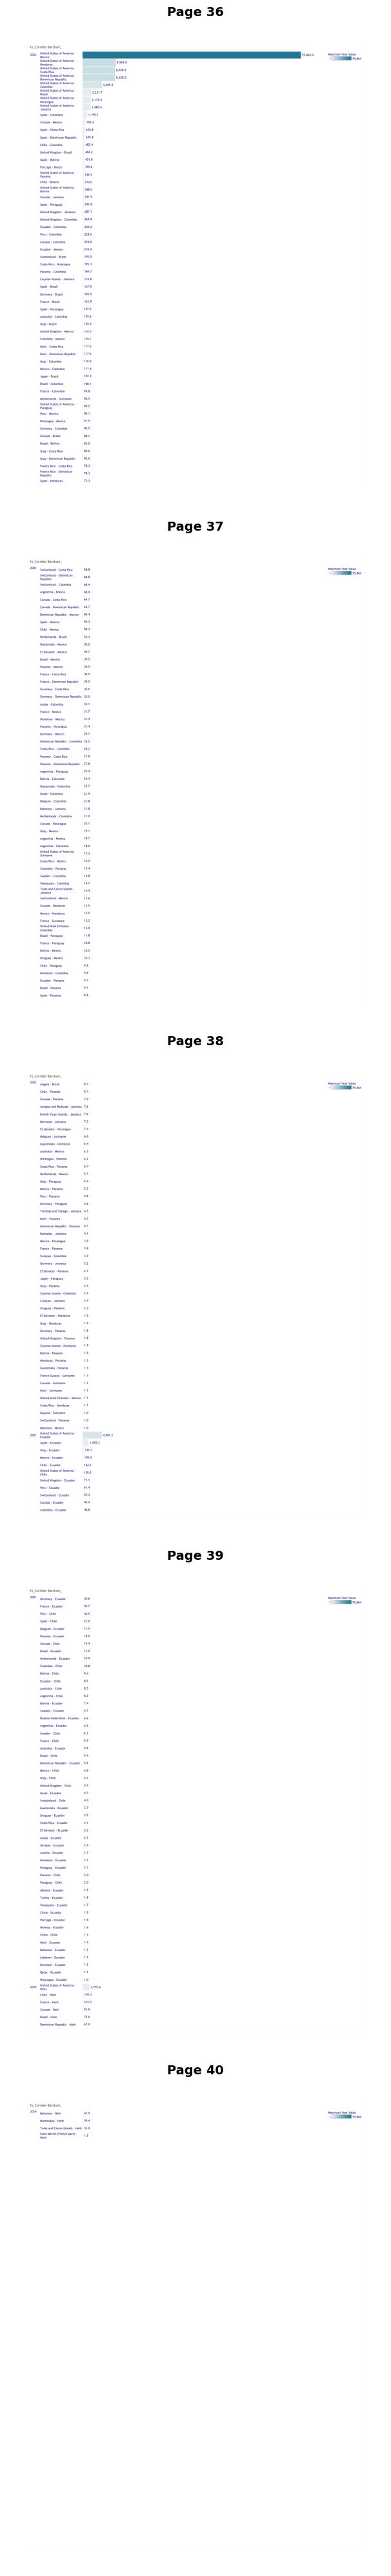

Saved page 36 as: C:\Users\clint\Desktop\RER\data\Remittance_3\remitscope_page_36.png
Saved page 37 as: C:\Users\clint\Desktop\RER\data\Remittance_3\remitscope_page_37.png
Saved page 38 as: C:\Users\clint\Desktop\RER\data\Remittance_3\remitscope_page_38.png
Saved page 39 as: C:\Users\clint\Desktop\RER\data\Remittance_3\remitscope_page_39.png
Saved page 40 as: C:\Users\clint\Desktop\RER\data\Remittance_3\remitscope_page_40.png

All 5 pages saved successfully using PyMuPDF!
Files saved:
  - C:\Users\clint\Desktop\RER\data\Remittance_3\remitscope_page_36.png
  - C:\Users\clint\Desktop\RER\data\Remittance_3\remitscope_page_37.png
  - C:\Users\clint\Desktop\RER\data\Remittance_3\remitscope_page_38.png
  - C:\Users\clint\Desktop\RER\data\Remittance_3\remitscope_page_39.png
  - C:\Users\clint\Desktop\RER\data\Remittance_3\remitscope_page_40.png


In [2]:
# Alternative approach using PyMuPDF (fitz) - more reliable on Windows
import io

try:
    import fitz  # PyMuPDF
    
    # Path to the PDF file
    pdf_path = r"C:\Users\clint\Desktop\RER\data\Remittance_3\Remitscope_LatAm_central_bank.pdf"
    
    if not os.path.exists(pdf_path):
        print(f"Error: PDF file not found at {pdf_path}")
    else:
        print(f"Using PyMuPDF to process: {pdf_path}")
        
        # Open the PDF
        doc = fitz.open(pdf_path)
        print(f"PDF has {len(doc)} pages")
        
        # Extract pages 36-40 (0-indexed: 35-39)
        start_page = 35  # Page 36 (0-indexed)
        end_page = 39    # Page 40 (0-indexed)
        
        if end_page >= len(doc):
            print(f"Warning: PDF only has {len(doc)} pages. Adjusting end page to {len(doc)-1}")
            end_page = len(doc) - 1
        
        if start_page >= len(doc):
            print(f"Error: Start page {start_page+1} is beyond the PDF length")
        else:
            images = []
            for page_num in range(start_page, min(end_page + 1, len(doc))):
                page = doc.load_page(page_num)
                
                # Render page to image with higher resolution
                mat = fitz.Matrix(2.0, 2.0)  # 2x zoom for better quality
                pix = page.get_pixmap(matrix=mat)
                
                # Convert to PIL Image
                img_data = pix.tobytes("png")
                img = Image.open(io.BytesIO(img_data))
                images.append((img, page_num + 1))  # Store with 1-indexed page number
            
            # Display the images
            fig, axes = plt.subplots(len(images), 1, figsize=(12, 8*len(images)))
            if len(images) == 1:
                axes = [axes]
            
            for i, (img, page_num) in enumerate(images):
                axes[i].imshow(img)
                axes[i].set_title(f'Page {page_num}', fontsize=14, fontweight='bold')
                axes[i].axis('off')
            
            plt.tight_layout()
            plt.show()
            
            # Save images to files
            output_dir = r"C:\Users\clint\Desktop\RER\data\Remittance_3"
            os.makedirs(output_dir, exist_ok=True)
            
            saved_files = []
            for img, page_num in images:
                filename = f"remitscope_page_{page_num}.png"
                filepath = os.path.join(output_dir, filename)
                img.save(filepath, "PNG", dpi=(200, 200))
                saved_files.append(filepath)
                print(f"Saved page {page_num} as: {filepath}")
            
            print(f"\nAll {len(images)} pages saved successfully using PyMuPDF!")
            print("Files saved:")
            for file in saved_files:
                print(f"  - {file}")
            
            doc.close()
            
except ImportError:
    print("PyMuPDF (fitz) not available. Installing...")
    import subprocess
    import sys
    subprocess.check_call([sys.executable, "-m", "pip", "install", "PyMuPDF"])
    print("PyMuPDF installed. Please run the cell again.")

Using PyMuPDF to process Africa PDF: C:\Users\clint\Desktop\RER\data\Remittance_3\Remitscope_Africa_central_bank.pdf
Africa PDF has 59 pages


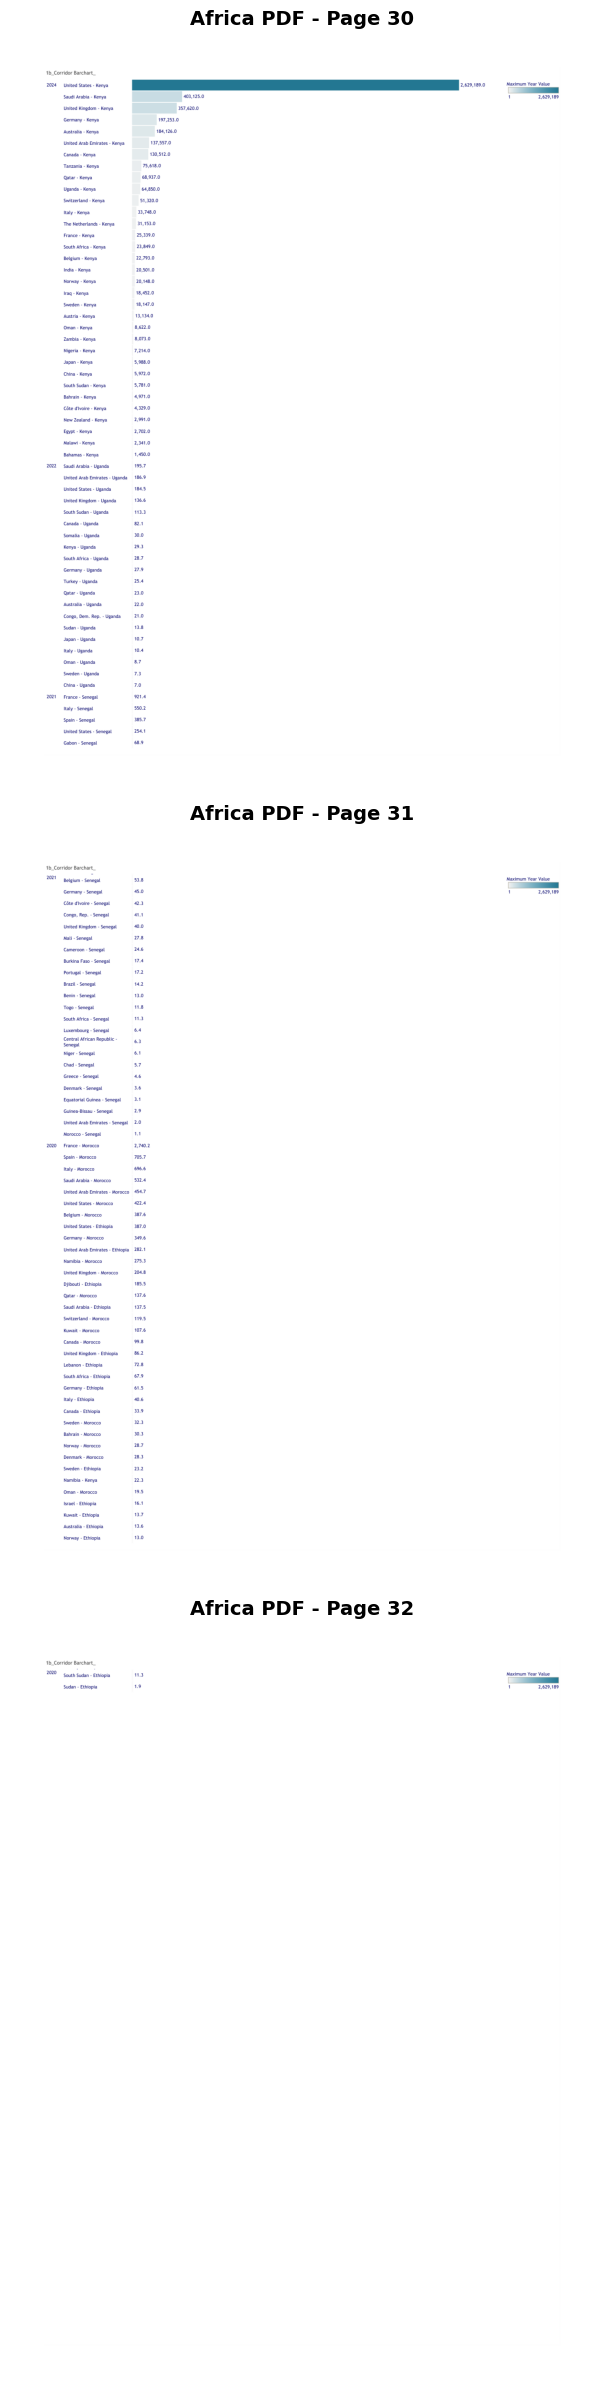

Saved Africa page 30 as: C:\Users\clint\Desktop\RER\data\Remittance_3\remitscope_africa_page_30.png
Saved Africa page 31 as: C:\Users\clint\Desktop\RER\data\Remittance_3\remitscope_africa_page_31.png
Saved Africa page 32 as: C:\Users\clint\Desktop\RER\data\Remittance_3\remitscope_africa_page_32.png

All 3 Africa pages saved successfully!
Africa files saved:
  - C:\Users\clint\Desktop\RER\data\Remittance_3\remitscope_africa_page_30.png
  - C:\Users\clint\Desktop\RER\data\Remittance_3\remitscope_africa_page_31.png
  - C:\Users\clint\Desktop\RER\data\Remittance_3\remitscope_africa_page_32.png


In [3]:
# Read pages 30-32 from Remitscope_Africa_central_bank.pdf
import io

try:
    import fitz  # PyMuPDF
    
    # Path to the Africa PDF file
    africa_pdf_path = r"C:\Users\clint\Desktop\RER\data\Remittance_3\Remitscope_Africa_central_bank.pdf"
    
    if not os.path.exists(africa_pdf_path):
        print(f"Error: PDF file not found at {africa_pdf_path}")
    else:
        print(f"Using PyMuPDF to process Africa PDF: {africa_pdf_path}")
        
        # Open the PDF
        doc = fitz.open(africa_pdf_path)
        print(f"Africa PDF has {len(doc)} pages")
        
        # Extract pages 30-32 (0-indexed: 29-31)
        start_page = 29  # Page 30 (0-indexed)
        end_page = 31    # Page 32 (0-indexed)
        
        if end_page >= len(doc):
            print(f"Warning: PDF only has {len(doc)} pages. Adjusting end page to {len(doc)-1}")
            end_page = len(doc) - 1
        
        if start_page >= len(doc):
            print(f"Error: Start page {start_page+1} is beyond the PDF length")
        else:
            africa_images = []
            for page_num in range(start_page, min(end_page + 1, len(doc))):
                page = doc.load_page(page_num)
                
                # Render page to image with higher resolution
                mat = fitz.Matrix(2.0, 2.0)  # 2x zoom for better quality
                pix = page.get_pixmap(matrix=mat)
                
                # Convert to PIL Image
                img_data = pix.tobytes("png")
                img = Image.open(io.BytesIO(img_data))
                africa_images.append((img, page_num + 1))  # Store with 1-indexed page number
            
            # Display the Africa images
            fig, axes = plt.subplots(len(africa_images), 1, figsize=(12, 8*len(africa_images)))
            if len(africa_images) == 1:
                axes = [axes]
            
            for i, (img, page_num) in enumerate(africa_images):
                axes[i].imshow(img)
                axes[i].set_title(f'Africa PDF - Page {page_num}', fontsize=14, fontweight='bold')
                axes[i].axis('off')
            
            plt.tight_layout()
            plt.show()
            
            # Save Africa images to files
            output_dir = r"C:\Users\clint\Desktop\RER\data\Remittance_3"
            os.makedirs(output_dir, exist_ok=True)
            
            africa_saved_files = []
            for img, page_num in africa_images:
                filename = f"remitscope_africa_page_{page_num}.png"
                filepath = os.path.join(output_dir, filename)
                img.save(filepath, "PNG", dpi=(200, 200))
                africa_saved_files.append(filepath)
                print(f"Saved Africa page {page_num} as: {filepath}")
            
            print(f"\nAll {len(africa_images)} Africa pages saved successfully!")
            print("Africa files saved:")
            for file in africa_saved_files:
                print(f"  - {file}")
            
            doc.close()
            
except ImportError:
    print("PyMuPDF (fitz) not available. Installing...")
    import subprocess
    import sys
    subprocess.check_call([sys.executable, "-m", "pip", "install", "PyMuPDF"])
    print("PyMuPDF installed. Please run the cell again.")